In [1]:
import sys
sys.path.append('..')

In [2]:
from processor import BatchProcessor

video_dir = '/media/adeshkadambi/WD_BLACK/PhD/test_folder/'

processor = BatchProcessor(
    video_dir=video_dir,
    num_frames=4,
    model="llama3.2-vision:latest"
)

processor.load_progress()
processor.process_videos()

2024-11-10 23:51:16,205 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/pull "HTTP/1.1 200 OK"
2024-11-10 23:51:16,206 - processor - INFO - Found 6 new videos to process
2024-11-10 23:51:16,210 - processor - INFO - Progress: 0/6 (0.0%)
2024-11-10 23:51:28,355 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 23:51:37,423 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 23:51:44,432 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 23:51:52,132 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 23:51:52,132 - inference - INFO - Frame analysis completed.
2024-11-10 23:51:58,489 - httpx - INFO - HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
2024-11-10 23:51:58,490 - inference - INFO - Context synthesis completed.
2024-11-10 23:52:06,326 - httpx - INFO - HTTP Request:

In [3]:
import json

with open(processor.results_path, 'r') as f:
    results = json.load(f)

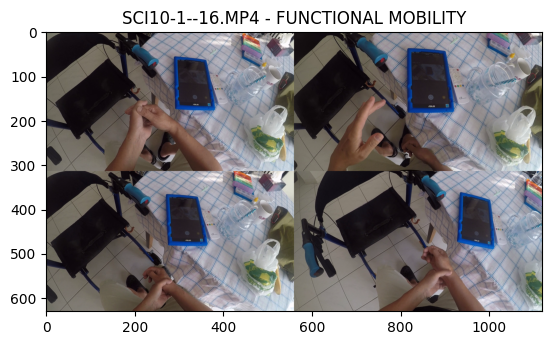

{'prediction': 'FUNCTIONAL MOBILITY', 'tags': ['walker', 'balance', 'small object', 'manipulation'], 'reasoning': 'The person is standing near their walker and using it for balance while performing an activity involving a small object in their hands. This suggests that they are engaging in functional mobility, which involves moving around and maintaining balance.', 'intermediates': {'Environment_Analysis': 'The room appears to be a clinical or rehabilitation setting with white tiled floors and walls. Various objects are scattered on tables throughout the frames, including a tablet or smartphone, a clear plastic water bottle, and a white mug with colorful designs.', 'ADL_Comparison': 'Functional mobility is confirmed as the correct ADL category because it matches the observed activities of standing near the walker and manipulating a small object. The other categories do not fit as well, as there is no evidence of feeding, grooming, or communication management.', 'OT_Discussion': "The oc

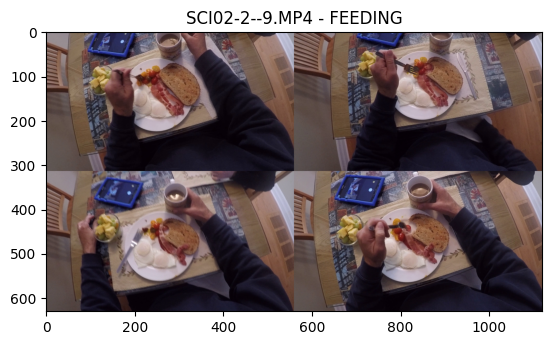

{'prediction': 'FEEDING', 'tags': ['eating', 'drinking', 'breakfast meal'], 'reasoning': 'The person is seated at a table, holding a spoon and sipping from a mug. The plate in front of them contains a breakfast meal consisting of poached eggs, bacon or ham, cherry tomatoes, toast, and fruit. This indicates that the person is actively engaged in eating.', 'intermediates': {'Environment_Analysis': 'The room is consistently described as a dining area or kitchen. A wooden table is present in all frames.', 'ADL_Comparison': "The person's hand positions change between frames, indicating that they are actively manipulating objects (e.g., holding a fork, spoon, or mug). The location of the bowl of fruit changes between frames.", 'OT_Discussion': "Occupational therapists agreed that the primary activity is feeding, as it involves consuming food and drink. They noted that the person's hand positions and object interactions are consistent with eating.", 'Expert_Evaluation': 'Three occupational th

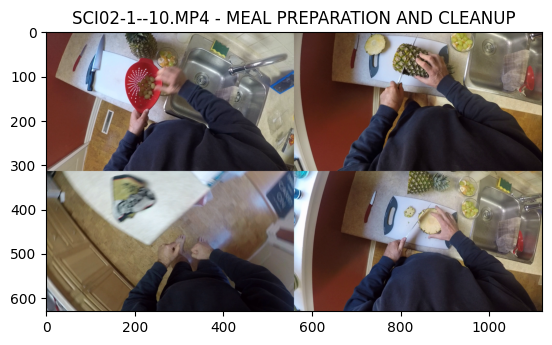

{'prediction': 'MEAL PREPARATION AND CLEANUP', 'tags': ['meal preparation', 'cutting board', 'sliced fruit', 'red-handled knife'], 'reasoning': "The person is observed to be preparing a meal, with actions such as holding a piece of pineapple (Frame 4), using a cutting board (Frame 4), and having various objects scattered across the countertop (Frames 2-4). The presence of sliced fruit in a bowl (Frame 4) and the red-handled knife (Frames 2 and 4) also support this classification. In contrast, other categories do not fit as well: FEEDING does not apply because the person is preparing food rather than consuming it; FUNCTIONAL MOBILITY is not relevant since the person's mobility is not being evaluated; GROOMING AND HEALTH MANAGEMENT is not applicable as there are no grooming or health-related actions observed; COMMUNICATION MANAGEMENT is also not relevant as there is no communication observed; HOME MANAGEMENT does not fit because the focus is on meal preparation rather than household mana

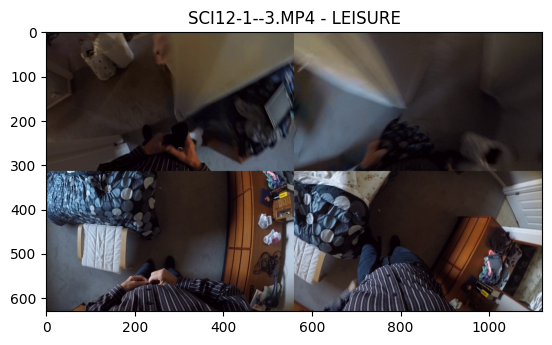

{'prediction': 'LEISURE', 'tags': ['leisure', 'entertainment', 'relaxation'], 'reasoning': 'The person is observed to be engaging in leisure activities, such as watching TV or browsing the internet. This is evident from frames 1-4 where they are seen holding a black object (phone/remote control) and interacting with it. The environmental context also suggests that this is a living space or bedroom, which is consistent with leisure activities.', 'intermediates': {'Environment_Analysis': 'The room appears to be a living space or bedroom with walls and furniture such as couches/sofas, beds, nightstands/dressers, and mirrors.', 'ADL_Comparison': 'Leisure activities are characterized by the absence of functional mobility, grooming, health management, communication management, home management, meal preparation and cleanup. The observed actions in frames 1-4 meet this criteria.', 'OT_Discussion': 'Occupational therapists agree that the person is engaging in leisure activities based on the evi

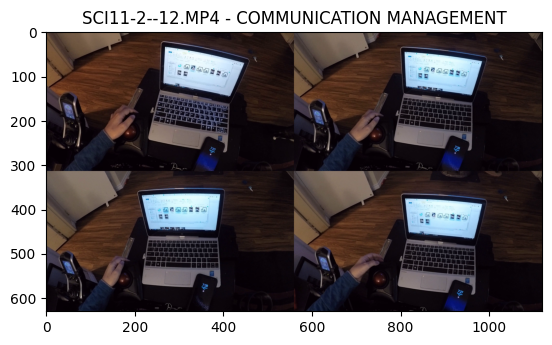

{'prediction': 'COMMUNICATION MANAGEMENT', 'tags': ['laptop', 'silver device', 'keyboard', 'mousepad'], 'reasoning': "The person is using multiple devices, including a laptop and a silver device with a screen. The laptop's screen is glowing, indicating it is in use. The silver device is being actively manipulated by the person's left hand, suggesting it is being used for reference or input while working on the laptop. This indicates that the person is engaged in some form of work or activity involving multiple devices, which falls under COMMUNICATION MANAGEMENT.", 'intermediates': {'Environment_Analysis': 'The room appears to be a home office or living space with wood floors and white walls. A black table is visible in the center of the image, which holds various objects.', 'ADL_Comparison': 'COMMUNICATION MANAGEMENT meets the criteria for this category as the person is using multiple devices to perform some form of work or activity.', 'OT_Discussion': 'Occupational therapists agree th

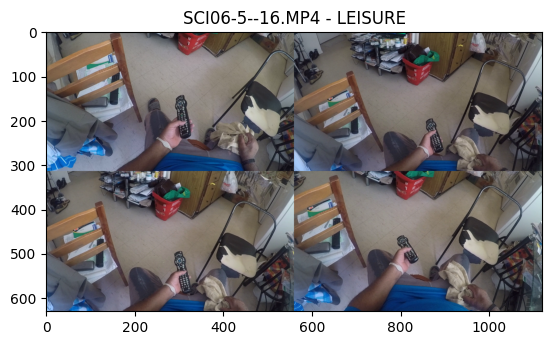

{'prediction': 'LEISURE', 'tags': ['remote control', 'beige cloth or towel', 'cluttered room'], 'reasoning': 'The person is holding a remote control in their left hand and a beige cloth or towel in their right hand, indicating they are engaged in leisure activities. The cluttered room with various items scattered around also supports this classification.', 'intermediates': {'Environment_Analysis': 'The environment is cluttered with various items scattered around, and there are red plastic baskets or containers in multiple frames.', 'ADL_Comparison': 'Leisure activities require sustained engagement with leisure objects, which is observed in the person holding a remote control. Other ADL categories do not fit as well.', 'OT_Discussion': 'Occupational therapists agreed that the classification of LEISURE was most appropriate based on the evidence.', 'Expert_Evaluation': 'Three occupational therapists evaluated the classification and found it to be accurate.', 'Final_Verification': "The fin

In [4]:
import os

from PIL import Image
from matplotlib import pyplot as plt

grids_path = os.path.join(processor.batch_dir, 'grids')

for video_name, video_results in results.items():
    pred = video_results['prediction']
    reasoning = video_results['reasoning']
    tags = video_results['tags']
    grid = os.path.join(grids_path, video_name.replace('.MP4', '_grid.png'))

    plt.imshow(Image.open(grid))
    plt.title(f'{video_name} - {pred}')
    plt.show()

    print(video_results)